#Import the library and mount google drive

In [33]:
from google.colab import drive
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Make the image data high resolution

Step 1: Loading the original ECG image
Image loaded successfully.
Image shape: (8268, 11693)
Image data type: uint8
Step 2: Resizing the image to a higher resolution (2x)
Resized image shape: (16536, 23386)
Step 3: Saving the high-resolution image
High-resolution image saved to /content/drive/MyDrive/ECG1/ECG.png
Step 4: Displaying the original and high-resolution images


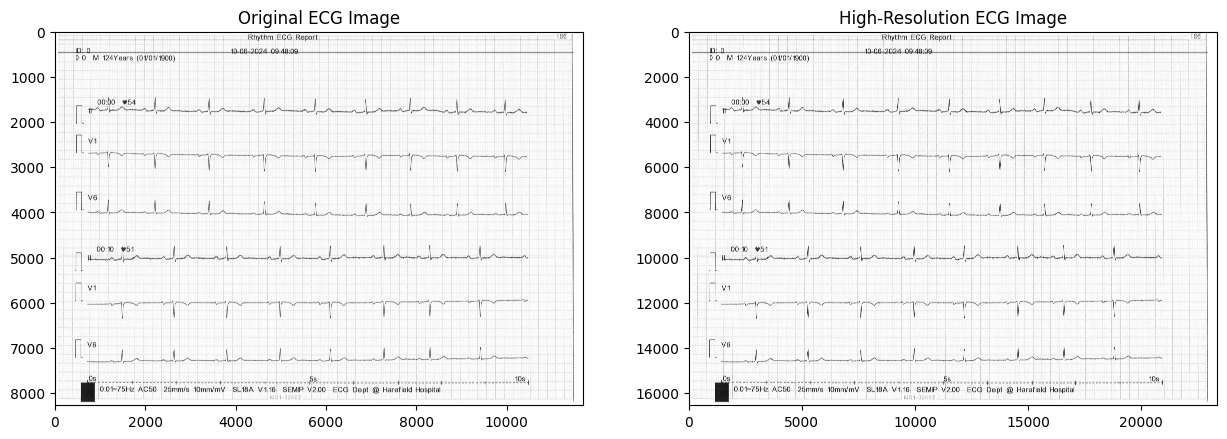

In [34]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the original ECG image
print("Step 1: Loading the original ECG image")
image_path = '/content/drive/MyDrive/ECG1/ECG1.png'
ecg_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if ecg_image is None:
    print("Error: Unable to load image.")
else:
    print("Image loaded successfully.")
    print(f"Image shape: {ecg_image.shape}")
    print(f"Image data type: {ecg_image.dtype}")

# Step 2: Resize the image to a higher resolution (e.g., 2x)
print("Step 2: Resizing the image to a higher resolution (2x)")
high_res_image = cv2.resize(ecg_image, (ecg_image.shape[1] * 2, ecg_image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)
print(f"Resized image shape: {high_res_image.shape}")

# Step 3: Save the high-resolution image
print("Step 3: Saving the high-resolution image")
high_res_image_path = '/content/drive/MyDrive/ECG1/ECG.png'
cv2.imwrite(high_res_image_path, high_res_image)
print(f"High-resolution image saved to {high_res_image_path}")

# Step 4: Display the original and high-resolution images
print("Step 4: Displaying the original and high-resolution images")
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(ecg_image, cmap='gray')
plt.title('Original ECG Image')

plt.subplot(1, 2, 2)
plt.imshow(high_res_image, cmap='gray')
plt.title('High-Resolution ECG Image')

plt.show()



#Load the ECG image data, convert it into CSV and plot and save

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original ECG Image


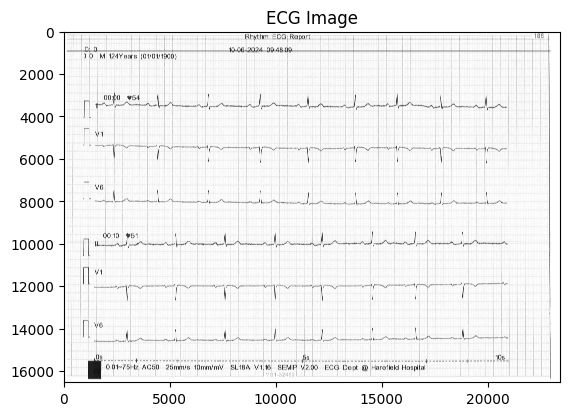

Begin conversion
Six time series data are extracted and saved


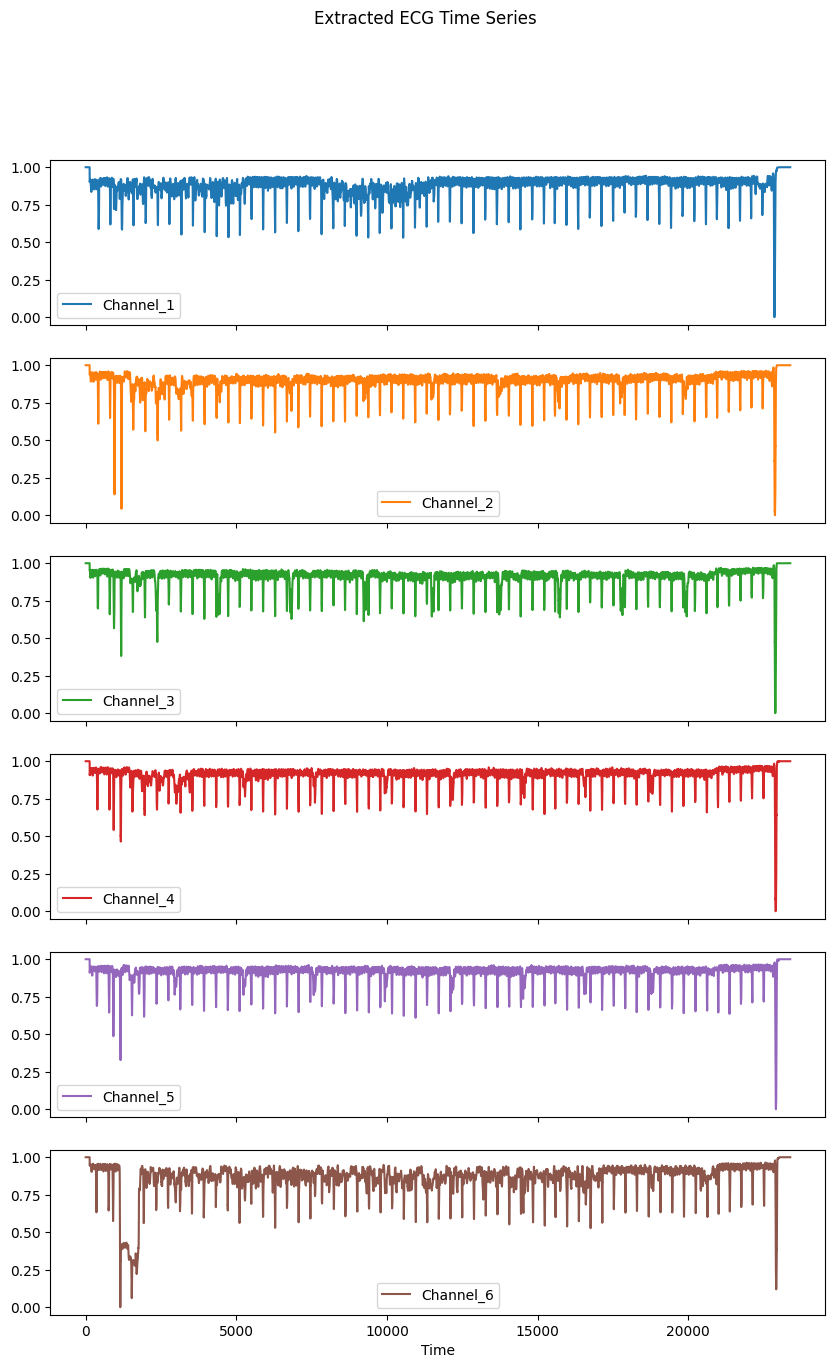

The shape of the CSV file is: 23386 rows and 6 columns


In [35]:
from google.colab import drive
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Load the ECG image
image_path = '/content/drive/MyDrive/ECG1/ECG.png'
ecg_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Step 3: Display the image to understand its structure
print('Original ECG Image')
plt.imshow(ecg_image, cmap='gray')
plt.title('ECG Image')
plt.show()

# Assuming the ECG image has 6 channels stacked vertically
# Step 4: Extract the six time series data
height, width = ecg_image.shape
num_channels = 6
channel_height = height // num_channels

# Initialize a list to hold the time series data
print('Begin conversion')
time_series_data = []

for i in range(num_channels):
    # Extract each channel
    channel = ecg_image[i*channel_height:(i+1)*channel_height, :]

    # Sum the pixel values vertically to get the signal
    signal = np.sum(channel, axis=0)

    # Normalize the signal
    signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

    # Append the signal to the time series data list
    time_series_data.append(signal)

# Convert the list to a DataFrame for better visualization and manipulation
df = pd.DataFrame(time_series_data).T
df.columns = [f'Channel_{i+1}' for i in range(num_channels)]

# Step 5: Display the extracted time series data
df.plot(subplots=True, figsize=(10, 15), title='Extracted ECG Time Series')
plt.xlabel('Time')
print('Six time series data are extracted and saved')
plt.show()

# Save the dataframe to a CSV file for further use
csv_file_path = '/content/drive/MyDrive/ECG1/ECG_TimeSeries_Data.csv'
df.to_csv(csv_file_path, index=False)

# Step 6: Print the shape of the CSV file
print(f'The shape of the CSV file is: {df.shape[0]} rows and {df.shape[1]} columns')


#+Load the saved CSV data
##+Transform it back into the original image
##+Save the image
##+Calculate the error between the original and the reconstructed image
##+Apply Open CV/ computer viosn in everty transforms

Step 1: Loading the original ECG image
Image loaded successfully.
Image shape: (16536, 23386)
Image data type: uint8
Displaying the original ECG Image


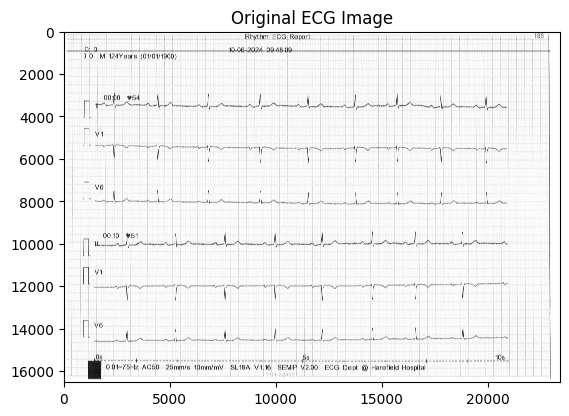

Step 2: Extracting the six time series data
Begin conversion
Extracting channel 1
Extracting channel 2
Extracting channel 3
Extracting channel 4
Extracting channel 5
Extracting channel 6
Converting the list to a DataFrame
Displaying the extracted time series data


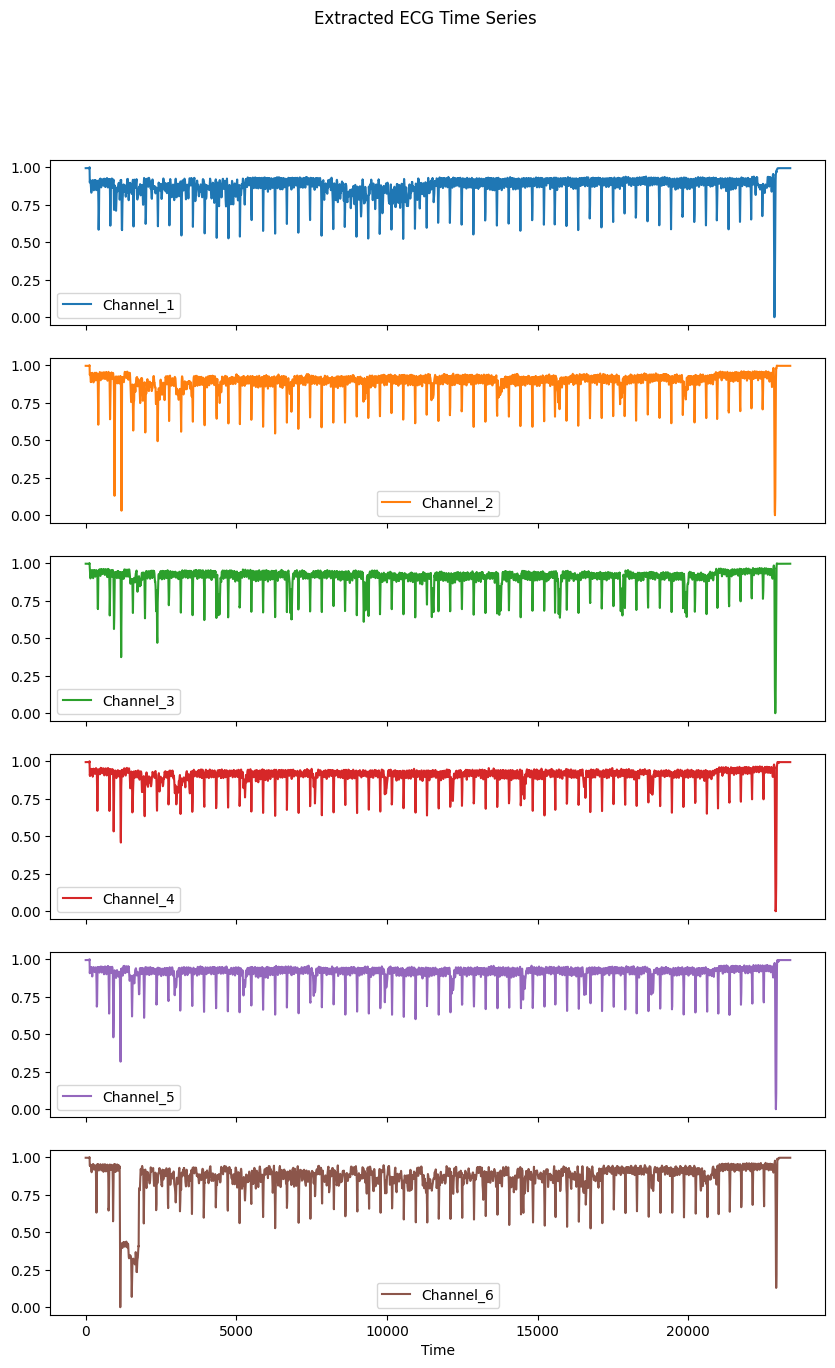

Saving the extracted time series data to a CSV file
Data saved to /content/drive/MyDrive/ECG1/ECG_TimeSeries_Data.csv
Loading the extracted time series data from the CSV file
Transforming the data back into the original image format
Reconstructing channel 1
Reconstructing channel 2
Reconstructing channel 3
Reconstructing channel 4
Reconstructing channel 5
Reconstructing channel 6
Saving the reconstructed image
Reconstructed image saved to /content/drive/MyDrive/ECG1/ECG_Reconstructed.png
Calculating the error between the original and the reconstructed image
Displaying the original, reconstructed images, and the error


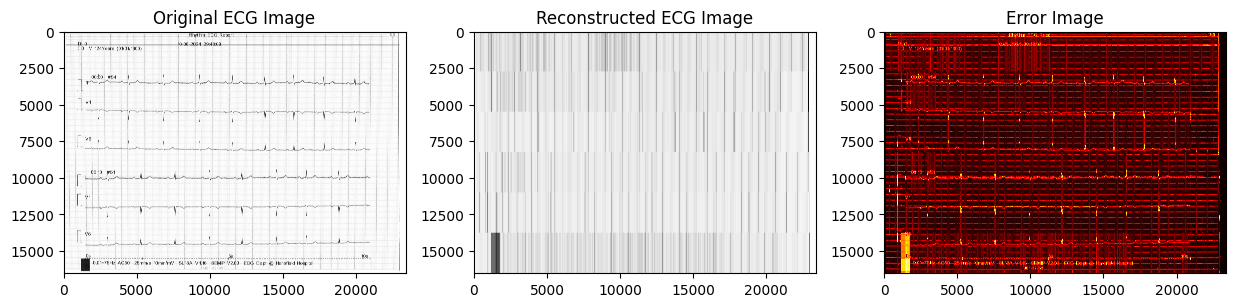

Mean Squared Error between original and reconstructed image: 107.97167272473233


In [42]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Define a low-pass filter function
def low_pass_filter(data, cutoff=0.1, fs=1.0, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Step 1: Load the original ECG image from the specified path
print("Step 1: Loading the original ECG image")
image_path = '/content/drive/MyDrive/ECG1/ECG.png'  # Update the image path and extension if it's JPEG
ecg_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if ecg_image is None:
    print("Error: Unable to load image.")
else:
    print("Image loaded successfully.")
    print(f"Image shape: {ecg_image.shape}")
    print(f"Image data type: {ecg_image.dtype}")

# Display the original ECG image
if ecg_image is not None:
    print('Displaying the original ECG Image')
    plt.imshow(ecg_image, cmap='gray')
    plt.title('Original ECG Image')
    plt.show()

    # Step 2: Extract the six time series data from the image
    print("Step 2: Extracting the six time series data")
    height, width = ecg_image.shape
    num_channels = 6
    channel_height = height // num_channels

    # Initialize a list to hold the time series data
    print('Begin conversion')
    time_series_data = []

    for i in range(num_channels):
        # Extract each channel
        print(f"Extracting channel {i+1}")
        channel = ecg_image[i*channel_height:(i+1)*channel_height, :]

        # Sum the pixel values vertically to get the signal
        signal = np.mean(channel, axis=0)

        # Apply low-pass filter to the signal
        signal = low_pass_filter(signal)

        # Normalize the signal
        signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal))

        # Append the signal to the time series data list
        time_series_data.append(signal)

    # Convert the list to a DataFrame for better visualization and manipulation
    print("Converting the list to a DataFrame")
    df = pd.DataFrame(time_series_data).T
    df.columns = [f'Channel_{i+1}' for i in range(num_channels)]

    # Step 3: Display the extracted time series data
    print("Displaying the extracted time series data")
    df.plot(subplots=True, figsize=(10, 15), title='Extracted ECG Time Series')
    plt.xlabel('Time')
    plt.show()

    # Step 4: Save the dataframe to a CSV file for further use
    print("Saving the extracted time series data to a CSV file")
    csv_file_path = '/content/drive/MyDrive/ECG1/ECG_TimeSeries_Data.csv'
    df.to_csv(csv_file_path, index=False)
    print(f"Data saved to {csv_file_path}")

    # Step 5: Load the extracted time series data from the CSV file
    print("Loading the extracted time series data from the CSV file")
    df = pd.read_csv(csv_file_path)

    # Step 6: Transform the data back into the original image format
    print("Transforming the data back into the original image format")
    reconstructed_image = np.zeros_like(ecg_image)

    for i in range(num_channels):
        # Get the signal for each channel
        print(f"Reconstructing channel {i+1}")
        signal = df[f'Channel_{i+1}'].values

        # Rescale the signal back to the original range
        signal = signal * (np.max(ecg_image) - np.min(ecg_image)) + np.min(ecg_image)

        # Normalize the signal during transformation
        signal = (signal - np.min(signal)) / (np.max(signal) - np.min(signal)) * 255

        # Reshape the signal back to the channel format
        channel = np.tile(signal, (channel_height, 1)).astype(np.uint8)

        # Assign the reconstructed channel to the corresponding part of the image
        reconstructed_image[i*channel_height:(i+1)*channel_height, :] = channel

    # Step 7: Save the reconstructed image
    print("Saving the reconstructed image")
    reconstructed_image_path = '/content/drive/MyDrive/ECG1/ECG_Reconstructed.png'
    cv2.imwrite(reconstructed_image_path, reconstructed_image)
    print(f"Reconstructed image saved to {reconstructed_image_path}")

    # Step 8: Calculate the error between the original and the reconstructed image
    print("Calculating the error between the original and the reconstructed image")
    error = np.abs(ecg_image - reconstructed_image)

    # Plot the original, reconstructed images, and the error
    print("Displaying the original, reconstructed images, and the error")
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(ecg_image, cmap='gray')
    plt.title('Original ECG Image')

    plt.subplot(1, 3, 2)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed ECG Image')

    plt.subplot(1, 3, 3)
    plt.imshow(error, cmap='hot')
    plt.title('Error Image')

    plt.show()

    # Step 9: Calculate and print the mean squared error
    mse = np.mean((ecg_image - reconstructed_image) ** 2)
    print(f'Mean Squared Error between original and reconstructed image: {mse}')
